# <font color=red>Bottom Line Up Front</font>

- There is no correlation between Ingredient Prices and Oil Prices
- Should there be a correlation?  Is there business knowledge that would be helpful or is this a hypothesis test?
- Recommendation 
     - Use free open source data (Frederal Reserve) to determine if external econmic factors are correlated with Ingredient Price and/or Oil Prices.  Sometimes not all internal data is correlated and external/economic variables impact internal variables.
         - If interested, ask me about my Patent about this! 
    - Control for quarters or months that typically have higher prices for the business so we can determine more insights.  
     
     

# Data Details 

- Ingredient Price Dataset (Price_x for merged_df)
     - 184 rows (before removing two missing values and outlier)
     - Date range: Monthly data 2005 - 2020
- Oil Price Dataset (Price_y for merged_df)
    - 8,385 rows
    - Date range: Daily data 1987 - 2020 
- Completed same steps for both oil/ingredient price and without the outliers. 

    - 

# Task

Understand the correlation (and lag in the correlation)
between the oil and the ingredient prices 

<br>

## Bonus Responses
- What is the quality of our data?
<font color=red> - Good data due to very few missing values and only 2 outliers that look like a manual entery error. How is this data gathered and is it a manual entry process?
<br></font>
   
<br>

- What are the time series properties, such as stationarity, seasonality, auto- and crosscorrelation?<font color=red> - Oil price (all Price_y values) is not stationary data by Dickey-Fuller method because it is not statistically significant (p-value graeater that .05).  The ingredient data had a p-value was equal to or less than .05.  This means this not by random chance (statistically significant). 
<br></font>

<br>

- Does the time series behavior change over time?
<font color=red> - Yes.  Also, there is a peak in year 2009 for both oil and ingredient price.
<br></font>


<br>

- Can we forecast price of raw ingredient using price of oil?
<font color=red> - No because there is no correlation
<br></font>

# Allison Gonzalez Outline 

## Occam's Razor 
- Simplest solution is the best solution
     - This is first iteration of analysis to answer the initial business question.  After sharing with business subject matter experts, another iteration will be completed (another step towards automation).
     - Sharing insights through an iterative process shows tranparancy and maiantains alignment between all stakeholders in involved in project. 
     
     
## Exploratory Data Analysis (EDA) 
- Good/Bad data in then Good/Bad data out
- Summary statistics, outliers, missing data, and visuals

## First Steps
- Exploratory Data Analysis (EDA) and Time Series Analysis for each dataset 
- Create Month and Year field to join Ingredient Price (df_ip) with Oil Price (df_op)

### Analysis Process 

- I filtered the Oil data from 8,385 to 3,901 based on the year equal to or greater than 2005 and less than or equal to 4/21/20 (Standard Limimits)

  - Example, a correlation can not be completed if there are no matching dates.  For the correlation analysis the 1987 data is irrelevant.  Also, we do not know how credible data prior to 2005 is credible.  In 1987 this data could have been manually entered from a typewriter and I wouldn't be concerned about trends in 1987. 


In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_ip = pd.read_csv('ingredient_prices.csv')

In [3]:
df_ip.head()

,Date,Price
0,1/1/2005,570
1,2/1/2005,570
2,3/1/2005,610
3,4/1/2005,600
4,5/1/2005,570


In [4]:
#check the type of fields helps with EDA
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
Date     184 non-null object
Price    183 non-null object
dtypes: object(2)
memory usage: 3.0+ KB


In [5]:
#make the object to date 
df_ip['Date'] = pd.to_datetime(df_ip['Date'], errors='coerce')
df_ip

,Date,Price
0,2005-01-01,570
1,2005-02-01,570
2,2005-03-01,610
3,2005-04-01,600
4,2005-05-01,570
...,...,...
179,2019-12-01,740
180,2020-01-01,740
181,2020-02-01,740
182,2020-03-01,720


In [6]:
#make price object to number
df_ip['Price'] = pd.to_numeric(df_ip['Price'],errors = 'coerce')

In [7]:
#sanity check: confirm types
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
Date     184 non-null datetime64[ns]
Price    182 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [8]:
# create year 
df_ip['Year'] = df_ip['Date'].dt.year
# create month
df_ip['Month'] = df_ip['Date'].dt.month
#check top rows
df_ip.head()

,Date,Price,Year,Month
0,2005-01-01,570.0,2005,1
1,2005-02-01,570.0,2005,2
2,2005-03-01,610.0,2005,3
3,2005-04-01,600.0,2005,4
4,2005-05-01,570.0,2005,5


/Applications/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(-2.450000000000003, 0.5, 'Ingredient Price')

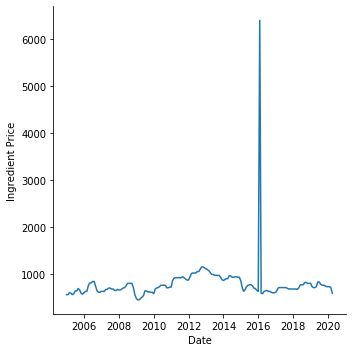

In [9]:
#check price over time
sns.relplot(data=df_ip, x="Date", y="Price", kind="line")
plt.ylabel("Ingredient Price")

In [10]:
#check last rows
df_ip.tail()

,Date,Price,Year,Month
179,2019-12-01,740.0,2019,12
180,2020-01-01,740.0,2020,1
181,2020-02-01,740.0,2020,2
182,2020-03-01,720.0,2020,3
183,2020-04-01,600.0,2020,4


In [11]:
#check count rows and colomn count 
print(df_ip.shape)

(184, 4)


In [12]:
#counts show each year has 12 months except for 2020
df_ip['Year'].value_counts(ascending=False)

2019    12
2018    12
2017    12
2016    12
2015    12
2014    12
2013    12
2012    12
2011    12
2010    12
2009    12
2008    12
2007    12
2006    12
2005    12
2020     4
Name: Year, dtype: int64

In [13]:
#summary statistics
#month is from 1 - 12, year from 2005 - 2020, max is 6,400, and Price is missing 2 values
df_ip.describe()

,Price,Year,Month
count,182.000000,184.000000,184.000000
mean,795.041209,2012.173913,6.413043
std,442.934750,4.441751,3.477177
min,460.000000,2005.000000,1.000000
25%,652.500000,2008.000000,3.000000
50%,720.000000,2012.000000,6.000000
75%,870.000000,2016.000000,9.000000
max,6400.000000,2020.000000,12.000000


In [14]:
price_pivot = df_ip.pivot(index="Year", columns="Month", values="Price")
price_pivot.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2005,570.0,570.0,610.0,600.0,570.0,590.0,650.0,650.0,700.0,670.0,600.0,580.0
2006,610.0,640.0,640.0,760.0,820.0,820.0,850.0,850.0,750.0,650.0,620.0,620.0
2007,640.0,640.0,640.0,680.0,680.0,710.0,710.0,690.0,690.0,660.0,660.0,680.0
2008,670.0,670.0,690.0,710.0,720.0,760.0,810.0,810.0,810.0,810.0,720.0,570.0
2009,490.0,460.0,460.0,490.0,520.0,550.0,650.0,650.0,630.0,630.0,620.0,620.0


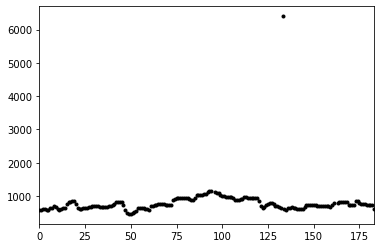

In [15]:
#row 135 (Feb 2016) shows the outlier 6,400
df_ip.Price.plot(style='k.')

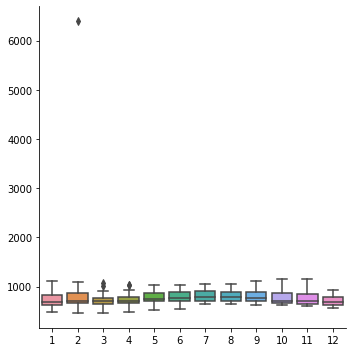

In [16]:
#box plots show the price mean, medain, mode and feb had the max
#month Marh and April have outliers
#outliers = black points above the max (top line of box plot)
sns.catplot(data=price_pivot, kind="box")

In [17]:
#date 2005 - 2020
df_ip.sort_values(by='Date')
print(df_ip)

          Date  Price  Year  Month
0   2005-01-01  570.0  2005      1
1   2005-02-01  570.0  2005      2
2   2005-03-01  610.0  2005      3
3   2005-04-01  600.0  2005      4
4   2005-05-01  570.0  2005      5
..         ...    ...   ...    ...
179 2019-12-01  740.0  2019     12
180 2020-01-01  740.0  2020      1
181 2020-02-01  740.0  2020      2
182 2020-03-01  720.0  2020      3
183 2020-04-01  600.0  2020      4

[184 rows x 4 columns]


## Same EDA for Oil Prices

In [18]:
df_op = pd.read_csv('oil_prices.csv')

In [19]:
df_op.head()

,Date,Price
0,5/20/1987,18.63
1,5/21/1987,18.45
2,5/22/1987,18.55
3,5/25/1987,18.6
4,5/26/1987,18.63


In [20]:
df_op.tail()

,Date,Price
8380,5/26/2020,33.95
8381,5/27/2020,32.73
8382,5/28/2020,33.98
8383,5/29/2020,34.15
8384,6/1/2020,36.74


In [21]:
df_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8385 entries, 0 to 8384
Data columns (total 2 columns):
Date     8385 non-null object
Price    8375 non-null object
dtypes: object(2)
memory usage: 131.1+ KB


In [22]:
df_op['Date'] = pd.to_datetime(df_op['Date'], errors='coerce')

In [23]:
df_op['Price'] = pd.to_numeric(df_op['Price'],errors = 'coerce')

In [24]:
df_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8385 entries, 0 to 8384
Data columns (total 2 columns):
Date     8385 non-null datetime64[ns]
Price    8374 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 131.1 KB


In [25]:
print(df_op.shape)

(8385, 2)


In [26]:
df_op.describe()

,Price
count,8374.000000
mean,46.955182
std,62.630176
min,9.100000
25%,18.772500
50%,31.625000
75%,66.910000
max,4946.000000


In [27]:
# create year 
df_op['Year'] = df_op['Date'].dt.year
# create month
df_op['Month'] = df_op['Date'].dt.month
#check top rows
df_op.head()

,Date,Price,Year,Month
0,1987-05-20,18.63,1987,5
1,1987-05-21,18.45,1987,5
2,1987-05-22,18.55,1987,5
3,1987-05-25,18.60,1987,5
4,1987-05-26,18.63,1987,5


Text(-2.450000000000003, 0.5, 'Oil Price')

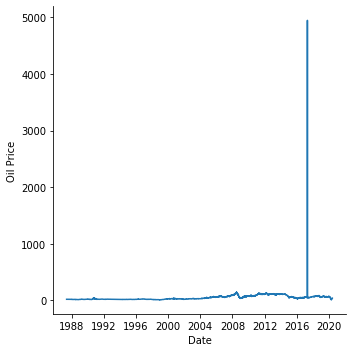

In [28]:
#check price over time
sns.relplot(data=df_op, x="Date", y="Price", kind="line")
plt.ylabel("Oil Price")

In [29]:
#counts show each year
df_op['Year'].value_counts(ascending=False)

2004    261
2003    258
2019    257
2005    257
2001    257
1992    257
1991    257
2017    256
1990    256
2015    255
2006    255
2016    255
1988    255
2002    255
1989    254
2014    254
1996    254
2000    253
2008    253
1998    253
1995    253
2018    252
2010    252
1994    252
2009    252
1993    252
2013    252
2007    250
2012    249
1999    249
2011    248
1997    248
1987    160
2020    104
Name: Year, dtype: int64

In [30]:
#counts show each month
df_op['Month'].value_counts(ascending=False)

10    731
8     723
3     722
7     718
6     705
5     705
11    699
9     697
1     689
12    674
4     668
2     654
Name: Month, dtype: int64

In [31]:
#summary statistics
#month is from 1 - 12, year from 1987 - 2020, max is 4,946, and Price is missing 39 values
df_op.describe()

,Price,Year,Month
count,8374.000000,8385.000000,8385.000000
mean,46.955182,2003.380680,6.530710
std,62.630176,9.553254,3.427972
min,9.100000,1987.000000,1.000000
25%,18.772500,1995.000000,4.000000
50%,31.625000,2003.000000,7.000000
75%,66.910000,2012.000000,10.000000
max,4946.000000,2020.000000,12.000000


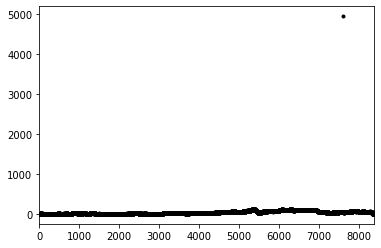

In [32]:
#row 7599 (Apr 2017) shows the outlier 4,946
df_op.Price.plot(style='k.')

In [33]:
op_price_pivot=df_op.pivot_table(index='Year', columns='Month', values='Price', aggfunc='mean')

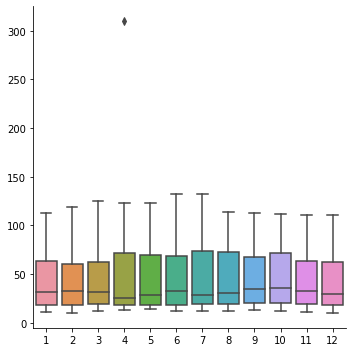

In [34]:
#box plots show the price mean, medain, mode and feb had the max
#April has an outlier
#outliers = black points above the max (top line of box plot)
sns.catplot(data=op_price_pivot, kind="box")

## Merge Ingredient and Oil Price at 2005 Year and Greater to Determine Correlations  (with outliers and missing values)

    - 

In [35]:
merged_df = df_ip.merge(df_op, how='inner', left_on=["Month", "Year"], right_on=["Month","Year"])

In [36]:
merged_df

,Date_x,Price_x,Year,Month,Date_y,Price_y
0,2005-01-01,570.0,2005,1,2005-01-04,40.75
1,2005-01-01,570.0,2005,1,2005-01-05,41.00
2,2005-01-01,570.0,2005,1,2005-01-06,43.25
3,2005-01-01,570.0,2005,1,2005-01-07,43.28
4,2005-01-01,570.0,2005,1,2005-01-10,44.71
...,...,...,...,...,...,...
3876,2020-04-01,600.0,2020,4,2020-04-24,15.87
3877,2020-04-01,600.0,2020,4,2020-04-27,15.17
3878,2020-04-01,600.0,2020,4,2020-04-28,15.60
3879,2020-04-01,600.0,2020,4,2020-04-29,17.86


In [37]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3881 entries, 0 to 3880
Data columns (total 6 columns):
Date_x     3881 non-null datetime64[ns]
Price_x    3839 non-null float64
Year       3881 non-null int64
Month      3881 non-null int64
Date_y     3881 non-null datetime64[ns]
Price_y    3871 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 212.2 KB


In [38]:
merged_df.corr()

,Price_x,Year,Month,Price_y
Price_x,1.000000,0.125253,-0.058594,0.038601
Year,0.125253,1.000000,-0.047415,-0.032960
Month,-0.058594,-0.047415,1.000000,0.000842
Price_y,0.038601,-0.032960,0.000842,1.000000


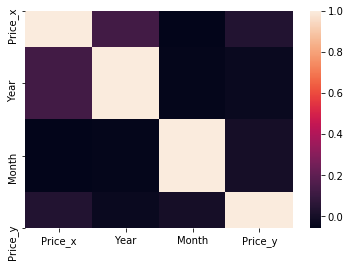

In [39]:
sns.heatmap(merged_df.corr());

# Removed Outliers and nine missing points: Seem to Have Been Keyed Incorrectly but Further Investigation Needs to be Completed (are these manual entries or how is this data gathered)

In [40]:
df_ip = pd.read_csv('ingredient_prices-Copy1.csv')

In [41]:
df_op = pd.read_csv('oil_prices-Copy1.csv')

In [42]:
df_ip['Date'] = pd.to_datetime(df_ip['Date'], errors='coerce')

In [43]:
df_ip['Price'] = pd.to_numeric(df_ip['Price'],errors = 'coerce')

In [44]:
df_op['Date'] = pd.to_datetime(df_op['Date'], errors='coerce')

In [45]:
df_op['Price'] = pd.to_numeric(df_op['Price'],errors = 'coerce')

In [46]:
# create year 
df_ip['Year'] = df_ip['Date'].dt.year
# create month
df_ip['Month'] = df_ip['Date'].dt.month
#check top rows
df_ip.head()

,Date,Price,Year,Month
0,2005-01-01,570.0,2005,1
1,2005-02-01,570.0,2005,2
2,2005-03-01,610.0,2005,3
3,2005-04-01,600.0,2005,4
4,2005-05-01,570.0,2005,5


In [47]:
# create year 
df_op['Year'] = df_op['Date'].dt.year
# create month
df_op['Month'] = df_op['Date'].dt.month
#check top rows
df_op.head()

,Date,Price,Year,Month
0,1987-05-20,18.63,1987,5
1,1987-05-21,18.45,1987,5
2,1987-05-22,18.55,1987,5
3,1987-05-25,18.60,1987,5
4,1987-05-26,18.63,1987,5


In [48]:
#joining data based on month and year
merged_df2 = df_ip.merge(df_op, how='inner', left_on=["Month", "Year"], right_on=["Month","Year"])

In [49]:
merged_df2.head()

,Date_x,Price_x,Year,Month,Date_y,Price_y
0,2005-01-01,570.0,2005,1,2005-01-04,40.75
1,2005-01-01,570.0,2005,1,2005-01-05,41.00
2,2005-01-01,570.0,2005,1,2005-01-06,43.25
3,2005-01-01,570.0,2005,1,2005-01-07,43.28
4,2005-01-01,570.0,2005,1,2005-01-10,44.71


In [50]:
merged_df2.corr()

,Price_x,Year,Month,Price_y
Price_x,1.000000,0.197610,0.087782,0.744125
Year,0.197610,1.000000,-0.048059,-0.155679
Month,0.087782,-0.048059,1.000000,0.015697
Price_y,0.744125,-0.155679,0.015697,1.000000


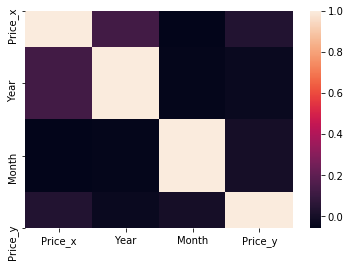

In [51]:
#showing still no correlation without outliers
sns.heatmap(merged_df.corr());

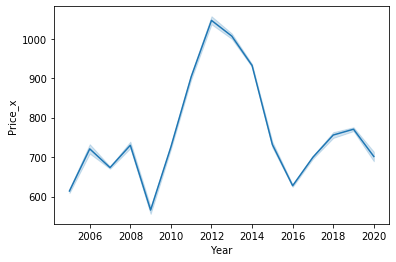

In [52]:
sns.lineplot(data=merged_df2, x="Year", y="Price_x")

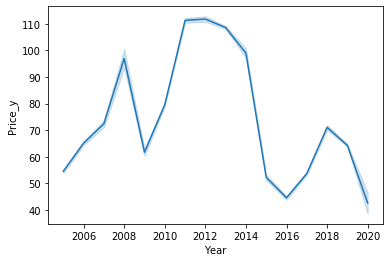

In [53]:
sns.lineplot(data=merged_df2, x="Year", y="Price_y")

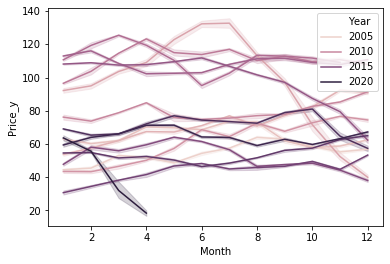

In [54]:
#2020 goes down in April because that is the last data point
sns.lineplot(data=merged_df2, x="Month", y="Price_y", hue="Year")

In [55]:
rolling_mean = merged_df2.Price_x.rolling(6).mean()
rolling_std = merged_df2.Price_x.rolling(6).std()

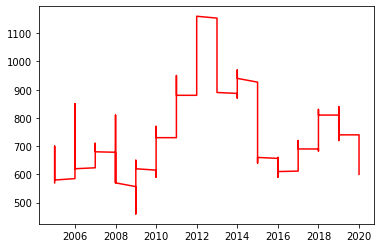

In [56]:
plt.plot(merged_df2.Year, rolling_mean, color="red")

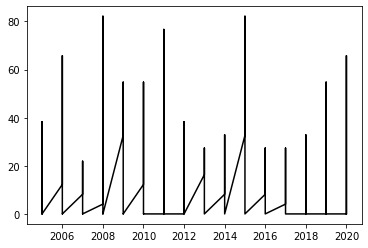

In [57]:
plt.plot(merged_df2.Year, rolling_std, color="black",label="Rolling Standard Deviation")

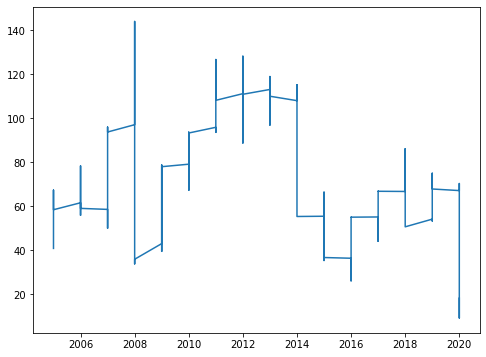

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(merged_df2.Year, merged_df2.Price_y);

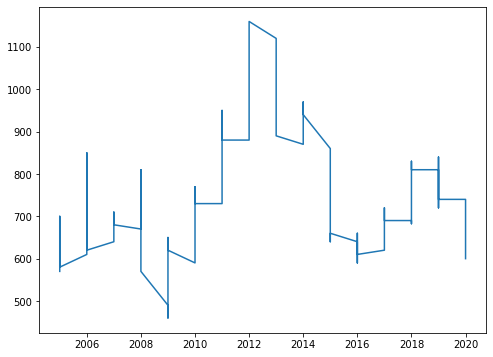

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(merged_df2.Year, merged_df2.Price_x);

## Time Series Analysis

In [60]:
from statsmodels.tsa.stattools import adfuller

In [61]:
adft = adfuller(merged_df2.Price_x,autolag="AIC")

In [62]:
adft_y = adfuller(merged_df2.Price_y,autolag="AIC")

In [63]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
"critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -2.847795              Test Statistics
1     0.051764                      p-value
2    22.000000             No. of lags used
3  3785.000000  Number of observations used
4    -3.432079          critical value (1%)
5    -2.862304          critical value (5%)
6    -2.567177         critical value (10%)


In [64]:
output_dfy = pd.DataFrame({"Values":[adft_y[0],adft_y[1],adft_y[2],adft_y[3], adft_y[4]['1%'], adft_y[4]['5%'], adft_y[4]['10%']] , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
"critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_dfy)

        Values                       Metric
0    -1.461085              Test Statistics
1     0.552667                      p-value
2     1.000000             No. of lags used
3  3806.000000  Number of observations used
4    -3.432069          critical value (1%)
5    -2.862300          critical value (5%)
6    -2.567174         critical value (10%)


In [65]:
autocorrelation_lag1 = merged_df2['Price_x'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.9982512543863622


In [66]:
autocorrelation_lagy1 = merged_df2['Price_y'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lagy1)

One Month Lag:  0.9982310441182429


In [67]:
autocorrelation_lag3 = merged_df2['Price_x'].autocorr(lag=3)
print("One Month Lag: ", autocorrelation_lag3)

One Month Lag:  0.9947496469652709


In [68]:
autocorrelation_lagy3 = merged_df2['Price_y'].autocorr(lag=3)
print("One Month Lag: ", autocorrelation_lagy3)

One Month Lag:  0.9944849499465137


In [69]:
autocorrelation_lag6 = merged_df2['Price_x'].autocorr(lag=6)
print("One Month Lag: ", autocorrelation_lag6)

One Month Lag:  0.9894869044676767


In [70]:
autocorrelation_lagy6 = merged_df2['Price_y'].autocorr(lag=6)
print("One Month Lag: ", autocorrelation_lagy6)

One Month Lag:  0.9887215415916998
